# HW 3: Spam/Ham Classification
## Due Date: 5/31 (Wed), 11:59 PM

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the project, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.

**Collaborators**: *list collaborators here*

## This Assignment
In this homework, you will use what you've learned in class to create a classifier that can distinguish spam (junk or commercial or bulk) emails from ham (non-spam) emails. In addition to providing some skeleton code to fill in, we will evaluate your work based on your model's accuracy and your written responses in this notebook.

After this homework, you should feel comfortable with the following:

- Part 1: Feature engineering with text data
- Part 2: Using sklearn libraries to process data and fit models
- Part 3: Validating the performance of your model and minimizing overfitting
- Part 3: Generating and analyzing precision-recall curves

## <span style="color:red">Warning!</span> 
We've tried our best to filter the data for anything blatantly offensive as best as we can, but unfortunately there may still be some examples you may find in poor taste. If you encounter these examples and believe it is inappropriate for students, please let a TA know and we will try to remove it for future semesters. Thanks for your understanding!

## Score Breakdown
Question | Points
--- | ---
1a | 2
1b | 2
1c | 2
2 | 3
3 | 3
4 | 3
5 | 3
6a | 3
6b | 3
6c | 3
6d | 3
7 | 4
8 | 4
Total | 38

# Part I - Initial Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

class bcolor:
   BLACK = '\033[40m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   END = '\033[0m'

def print_passed(str_in):
  print(bcolor.BLACK + bcolor.YELLOW + bcolor.BOLD + str_in + bcolor.END)

## Mount your Google Drive
When you run a code cell, Colab executes it on a temporary cloud instance.  Every time you open the notebook, you will be assigned a different machine.  All compute state and files saved on the previous machine will be lost.  Therefore, you may need to re-download datasets or rerun code after a reset. Here, you can mount your Google drive to the temporary cloud instance's local filesystem using the following code snippet and save files under the specified directory (note that you will have to provide permission every time you run this).

In [2]:
# mount Google drive
from google.colab import drive
drive.mount('/content/drive')

# now you can see files
!echo -e "\nNumber of Google drive files in /content/drive/My Drive/:"
!ls -l "/content/drive/My Drive/" | wc -l
# by the way, you can run any linux command by putting a ! at the start of the line

# by default everything gets executed and saved in /content/
!echo -e "\nCurrent directory:"
!pwd

Mounted at /content/drive

Number of Google drive files in /content/drive/My Drive/:
24

Current directory:
/content


In [3]:
workspace_path = '/content/drive/MyDrive/COSE471'  # Change this path!
print(f'Current Workspace: {workspace_path}')

Current Workspace: /content/drive/MyDrive/COSE471


### Loading in the Data

Our goal is to classify emails as spam or not spam (referred to as "ham") using features generated from the text in the email. 

The dataset consists of email messages and their labels (0 for ham, 1 for spam). Your labeled training dataset contains 8348 labeled examples, and the test set contains 1000 unlabeled examples.

Run the following cells to load in the data into DataFrames.

The `train` DataFrame contains labeled data that you will use to train your model. It contains four columns:

1. `id`: An identifier for the training example
1. `subject`: The subject of the email
1. `email`: The text of the email
1. `spam`: 1 if the email is spam, 0 if the email is ham (not spam)

The `test` DataFrame contains 1000 unlabeled emails. You will predict labels for these emails and submit your predictions to Kaggle for evaluation.

In [4]:
original_training_data = pd.read_csv(f'{workspace_path}/train.csv')
test = pd.read_csv(f'{workspace_path}/test.csv')

# Convert the emails to lower case as a first step to processing the text
original_training_data['email'] = original_training_data['email'].str.lower()
test['email'] = test['email'].str.lower()

original_training_data.head()

,id,subject,email,spam
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0
2,2,Subject: It's just too small ...,<html>\n <head>\n </head>\n <body>\n <font siz...,1
3,3,Subject: liberal defnitions\n,depends on how much over spending vs. how much...,0
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0


### Question 1a
First, let's check if our data contains any missing values. 

- Step1: Fill in the cell below to print the number of NaN values in each column. **Hint**: [pandas.isnull](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html)
- Step2: If there are NaN values, replace them with appropriate filler values (i.e., NaN values in the `subject` or `email` columns should be replaced with empty strings). 
- Step3: Print the number of NaN values in each column after this modification to verify that there are no NaN values left.

<!--
BEGIN QUESTION
name: q1a
points: 1
-->

In [5]:
# BEGIN YOUR CODE
# -----------------------
print('Before imputation:')
print(original_training_data.isnull().sum())
original_training_data=original_training_data.fillna("")
print('------------')
print('After imputation:')
print(original_training_data.isnull().sum())
# -----------------------
# END YOUR CODE

Before imputation:
id         0
subject    6
email      0
spam       0
dtype: int64
------------
After imputation:
id         0
subject    0
email      0
spam       0
dtype: int64


In [6]:
assert original_training_data.isnull().sum().sum() == 0
print_passed('Q1a: Passed all unit tests!')

Q1a: Passed all unit tests!


### Question 1b

In the cell below, print the text of the first ham (i.e. 1st row) and the first spam email in the original training set.

<!--
BEGIN QUESTION
name: q1b
points: 1
-->

In [7]:
# BEGIN YOUR CODE
# -----------------------
first_ham = original_training_data[original_training_data["spam"]==0].iloc[0]["email"]
first_spam = original_training_data[original_training_data["spam"]==1].iloc[0]["email"]
# -----------------------
# END YOUR CODE

print('The text of the first Ham:')
print('------------')
print(first_ham)

print('The text of the first Spam:')
print('------------')
print(first_spam)

The text of the first Ham:
------------
url: http://boingboing.net/#85534171
 date: not supplied
 
 arts and letters daily, a wonderful and dense blog, has folded up its tent due 
 to the bankruptcy of its parent company. a&l daily will be auctioned off by the 
 receivers. link[1] discuss[2] (_thanks, misha!_)
 
 [1] http://www.aldaily.com/
 [2] http://www.quicktopic.com/boing/h/zlfterjnd6jf
 
 

The text of the first Spam:
------------
<html>
 <head>
 </head>
 <body>
 <font size=3d"4"><b> a man endowed with a 7-8" hammer is simply<br>
  better equipped than a man with a 5-6"hammer. <br>
 <br>would you rather have<br>more than enough to get the job done or fall =
 short. it's totally up<br>to you. our methods are guaranteed to increase y=
 our size by 1-3"<br> <a href=3d"http://209.163.187.47/cgi-bin/index.php?10=
 004">come in here and see how</a>
 </body>
 </html>
 
 
 



In [8]:
assert len(first_ham) == 359 and len(first_spam) == 444
print_passed('Q1b: Passed all unit tests!')

Q1b: Passed all unit tests!


### Question 1c

Discuss one thing you notice that is different between the two emails that might relate to the identification of spam.

<!--
BEGIN QUESTION
name: q1c
manual: True
points: 2
-->
<!-- EXPORT TO PDF -->

Answer: `URL address is given in the text as hyperlinked in the email text in the case of ham, but URL address is given in the HTML Tag in the case of spam email.`

## Training Validation Split
The training data is all the data we have available for both training models and **validating** the models that we train. We therefore need to split the training data into separate training and validation datsets. You will need this **validation data** to assess the performance of your classifier once you are finished training. 

Note that we set the seed (random_state) to 42. This will produce a pseudo-random sequence of random numbers that is the same for every student. **Do not modify this in the following questions, as our tests depend on this random seed.**

In [9]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(
    original_training_data, test_size=0.1, random_state=42)

In [10]:
print(train.shape, val.shape)   # 더해서 8342 맞음

(7513, 4) (835, 4)


# Basic Feature Engineering

We would like to take the text of an email and predict whether the email is **ham** or **spam**. This is a *classification* problem, and here we use logistic regression to train a classifier. 

Recall that to train an logistic regression model we need:
 - a numeric feature matrix $X$
 - a vector of corresponding binary labels $y$.

Unfortunately, our data are text, not numbers. To address this, we can create numeric features derived from the email text and use those features for logistic regression:
 - Each row of $X$ is an email.
 - Each column of $X$ contains one feature for all the emails. 
 
We'll guide you through creating a simple feature, and you'll create more interesting ones when you are trying to increase your accuracy.

### Question 2

Create a function called `words_in_texts` that takes in a list of `words` and a pandas Series of email `texts`. It should output a 2-dimensional NumPy array containing one row for each email text. The row should contain either a 0 or a 1 for each word in the list: 0 if the word doesn't appear in the text and 1 if the word does. For example:

```
>>> words_in_texts(['hello', 'bye', 'world'], 
                   pd.Series(['hello', 'hello worldhello']))

array([[1, 0, 0],
       [1, 0, 1]])
```

**Hint**: [pandas.Series.str.contains](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html)

*The provided tests make sure that your function works correctly, so that you can use it for future questions.*

<!--
BEGIN QUESTION
name: q2
points: 3
-->

In [11]:
from tables.tests.common import TestFileMixin
def words_in_texts(words, texts):
    '''
    Args:
        words (list-like): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    # BEGIN YOUR CODE
    # -----------------------
    indicator_array = []
    for text in texts:
      row = [int(word in text) for word in words]
      indicator_array.append(row)
    #indicator_array = np.array(indicator_array)
    # -----------------------
    # END YOUR CODE
    return indicator_array

In [12]:
assert np.allclose(
    words_in_texts(
        ['hello', 'bye', 'world'], 
        pd.Series(['hello', 'hello worldhello'])), 
    np.array([[1, 0, 0], [1, 0, 1]]))

assert np.allclose(
    words_in_texts(
        ['a', 'b', 'c', 'd', 'e', 'f', 'g'], 
        pd.Series(['a b c d ef g', 'a', 'b', 'c', 'd e f g', 'h', 'a h'])), 
    np.array(
        [[1,1,1,1,1,1,1], 
         [1,0,0,0,0,0,0],
         [0,1,0,0,0,0,0],
         [0,0,1,0,0,0,0],
         [0,0,0,1,1,1,1],
         [0,0,0,0,0,0,0],
         [1,0,0,0,0,0,0]]))

print_passed('Q2: Passed all unit tests!')

Q2: Passed all unit tests!


# Basic EDA

We need to identify some features that allow us to distinguish spam emails from ham emails. One idea is to compare the distribution of a single feature in spam emails to the distribution of the same feature in ham emails. 

If the feature is itself a binary indicator (such as whether a certain word occurs in the text), this amounts to comparing the proportion of spam emails with the word to the proportion of ham emails with the word.

In [13]:
from IPython.display import display, Markdown
df = pd.DataFrame({
    'word_1': [1, 0, 1, 0],
    'word_2': [0, 1, 0, 1],
    'type': ['spam', 'ham', 'ham', 'ham']
})
display(Markdown("> Our Original DataFrame has some words column and a type column. You can think of each row is a sentence, and the value of 1 or 0 indicates the number of occurances of the word in this sentence."))
display(df);
display(Markdown("> `melt` will turn columns into variale, notice how `word_1` and `word_2` become `variable`, their values are stoed in the value column"))
display(df.melt("type"))

> Our Original DataFrame has some words column and a type column. You can think of each row is a sentence, and the value of 1 or 0 indicates the number of occurances of the word in this sentence.

,word_1,word_2,type
0,1,0,spam
1,0,1,ham
2,1,0,ham
3,0,1,ham


> `melt` will turn columns into variale, notice how `word_1` and `word_2` become `variable`, their values are stoed in the value column

,type,variable,value
0,spam,word_1,1
1,ham,word_1,0
2,ham,word_1,1
3,ham,word_1,0
4,spam,word_2,0
5,ham,word_2,1
6,ham,word_2,0
7,ham,word_2,1


We can create a bar chart like the one above comparing the proportion of spam and ham emails containing certain words. Choose a set of words that are different from the ones above, but also have different proportions for the two classes. Make sure that we only consider emails from `train`.

<!--
BEGIN QUESTION
name: q3a
manual: True
format: image
points: 2
-->
<!-- EXPORT TO PDF format:image -->

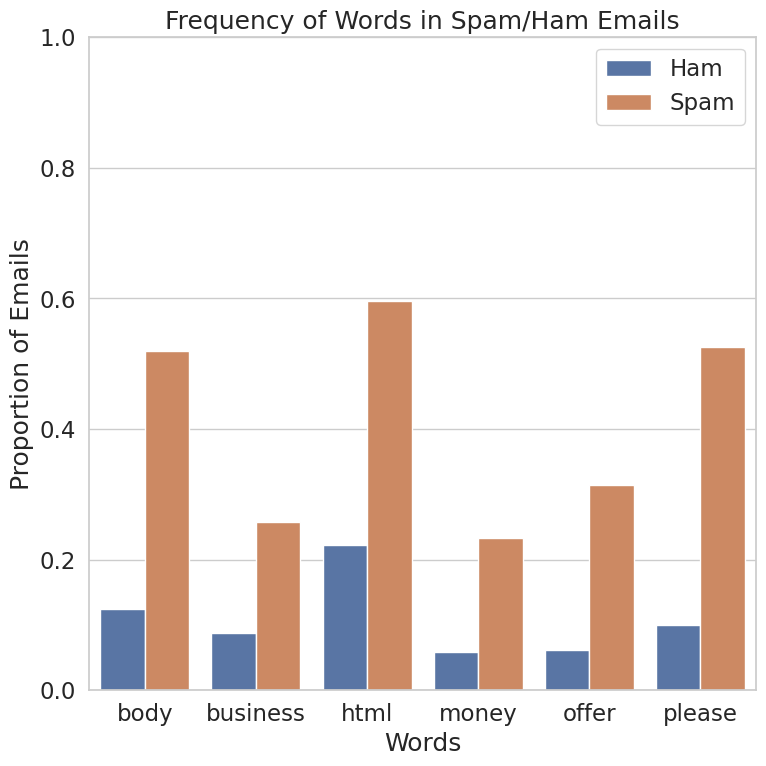

In [14]:
# We must do this in order to preserve the ordering of emails to labels for words_in_texts
train=train.reset_index(drop=True) 

some_words = ['body', 'html', 'please', 'money', 'business', 'offer']
Phi_train = words_in_texts(some_words, train['email'])

df = pd.DataFrame(data = Phi_train, columns = some_words)
df['label'] = train['spam']

plt.figure(figsize=(8,8))
sns.barplot(x = "variable", 
            y = "value", 
            hue = "label", 
            data = (df
                    .replace({'label': 
                                {0 : 'Ham', 
                                 1 : 'Spam'}})
                    .melt('label')
                    .groupby(['label', 'variable'])
                    .mean()
                    .reset_index()))

plt.ylim([0, 1])
plt.xlabel('Words')
plt.ylabel('Proportion of Emails')
plt.legend(title = "")
plt.title("Frequency of Words in Spam/Ham Emails")
plt.tight_layout()
plt.show()

### Question 3

When the feature is binary, it makes sense to compare its proportions across classes (as in the previous question). Otherwise, if the feature can take on numeric values, we can compare the distributions of these values for different classes. 

Create a *class conditional density plot* like the one above (using `sns.distplot`), comparing the distribution of the length of spam emails to the distribution of the length of ham emails in the training set. Set the x-axis limit from 0 to 50000.

<!--
BEGIN QUESTION
name: q3b
manual: True
format: image
points: 2
-->
<!-- EXPORT TO PDF format:image -->

<ipython-input-15-4df7be0ea2b0>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ham_length, hist = False, kde = True, label="Ham")
<ipython-input-15-4df7be0ea2b0>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(spam_length, hist = False, kde = True, label="Spam")


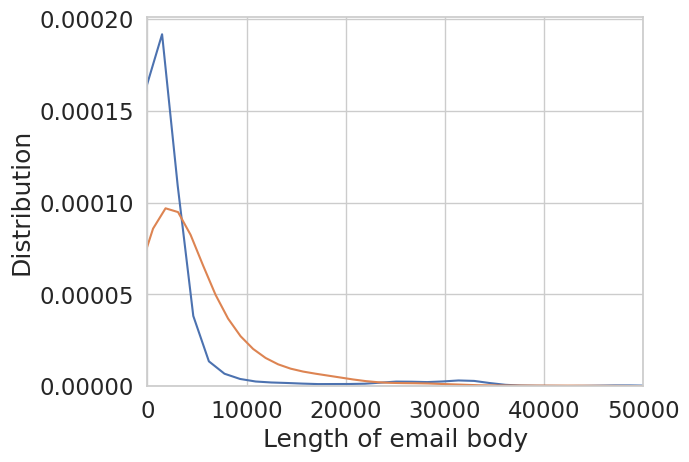

<Figure size 600x800 with 0 Axes>

In [15]:
# BEGIN SOLUTION
ham_length = train[train["spam"]==0]["email"].str.len()
spam_length = train[train["spam"]==1]["email"].str.len()

x_axis_limit = (0,50000)

sns.distplot(ham_length, hist = False, kde = True, label="Ham")
sns.distplot(spam_length, hist = False, kde = True, label="Spam")

plt.xlim(x_axis_limit)

plt.xlabel("Length of email body")
plt.ylabel("Distribution")

df = pd.DataFrame(data = Phi_train, columns = some_words)
df['label'] = train['spam']

plt.figure(figsize=(6,8))
plt.tight_layout()
plt.show()
# END SOLUTION

## Basic Classification

Notice that the output of `words_in_texts(words, train['email'])` is a numeric matrix containing features for each email. This means we can use it directly to train a classifier!

### Question 4

We've given you 5 words that might be useful as features to distinguish spam/ham emails. Use these words as well as the `train` DataFrame to create two NumPy arrays: `X_train` and `Y_train`.

- `X_train` should be a matrix of 0s and 1s created by using your `words_in_texts` function on all the emails in the training set.

- `Y_train` should be a vector of the correct labels for each email in the training set.

*The provided tests check that the dimensions of your feature matrix (X) are correct, and that your features and labels are binary (i.e. consists of 0 and 1, no other values). It does not check that your function is correct; that was verified in a previous question.*

<!--
BEGIN QUESTION
name: q4
points: 2
-->

In [16]:
some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

# BEGIN YOUR CODE
# -----------------------
Phi_train = words_in_texts(some_words, train['email'])

X_train = np.array(pd.DataFrame(data = Phi_train, columns = some_words))
Y_train = np.array(train["spam"])
# -----------------------
# END YOUR CODE

X_train[:5], Y_train[:5]

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0]]),
 array([0, 0, 0, 0, 0]))

In [17]:
assert X_train.shape == (7513, 5)
assert len(np.unique(X_train)) == 2
assert len(np.unique(Y_train)) == 2

print_passed('Q4: Passed all unit tests!')

Q4: Passed all unit tests!


### Question 5

Now we have matrices we can give to scikit-learn! 

- Using the [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier, train a logistic regression model using `X_train` and `Y_train`.
- Then, output the accuracy of the model (on the training data) in the cell below. You should get an accuracy around 75\%.

<!--
BEGIN QUESTION
name: q5
points: 2
-->

In [18]:
from sklearn.linear_model import LogisticRegression

# BEGIN YOUR CODE
# -----------------------
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_train_prediction = model.predict(X_train)
training_accuracy = sum(Y_train == Y_train_prediction)/len(train)
# -----------------------
# END YOUR CODE

("Training Accuracy: ", training_accuracy)

('Training Accuracy: ', 0.7576201251164648)

In [19]:
assert training_accuracy > 0.72
print_passed('Q5: Passed all unit tests!')

Q5: Passed all unit tests!


## Evaluating Classifiers

That doesn't seem too shabby! But the classifier you made above isn't as good as this might lead us to believe. First, we are evaluating accuracy on the training set, which may lead to a misleading accuracy measure, especially if we used the training set to identify discriminative features. In future parts of this analysis, it will be safer to hold out some of our data for model validation and comparison.

Presumably, our classifier will be used for **filtering**, i.e. preventing messages labeled `spam` from reaching someone's inbox. There are two kinds of errors we can make:
- False positive (FP): a ham email gets flagged as spam and filtered out of the inbox.
- False negative (FN): a spam email gets mislabeled as ham and ends up in the inbox.

These definitions depend both on the true labels and the predicted labels. False positives and false negatives may be of differing importance, leading us to consider more ways of evaluating a classifier, in addition to overall accuracy:

**Precision** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FP}}$ of emails flagged as spam that are actually spam.

**Recall** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FN}}$ of spam emails that were correctly flagged as spam. 

**False-alarm rate** measures the proportion $\frac{\text{FP}}{\text{FP} + \text{TN}}$ of ham emails that were incorrectly flagged as spam. 

The following image might help:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width="500px">

Note that a true positive (TP) is a spam email that is classified as spam, and a true negative (TN) is a ham email that is classified as ham.

### Question 6a

Suppose we have a classifier `zero_predictor` that always predicts 0 (never predicts positive). How many false positives and false negatives would this classifier have if it were evaluated on the training set and its results were compared to `Y_train`? Fill in the variables below (answers can be hard-coded):

<!--
BEGIN QUESTION
name: q6a
points: 1
-->

In [20]:
# BEGIN YOUR CODE
# -----------------------
zero_predictor = np.zeros(len(train))
zero_predictor_fp = np.sum(zero_predictor == 1)
zero_predictor_fn = len(Y_train[Y_train==1])
# -----------------------
# END YOUR CODE

In [21]:
assert zero_predictor_fp + zero_predictor_fn == 1918
print_passed('Q6a: Passed all unit tests!')

Q6a: Passed all unit tests!


### Question 6b

What are the accuracy and recall of `zero_predictor` (classifies every email as ham) on the training set? Do NOT use any `sklearn` functions.

<!--
BEGIN QUESTION
name: q6b
points: 1
-->

In [22]:
# BEGIN YOUR CODE
# -----------------------
zero_predictor_acc = sum(Y_train == zero_predictor)/len(zero_predictor)
zero_predictor_recall = 0
# -----------------------
# END YOUR CODE

In [23]:
assert np.isclose(zero_predictor_acc + zero_predictor_recall, 0.7447091707706642)
print_passed('Q6b: Passed all unit tests!')

Q6b: Passed all unit tests!


### Question 6c

Compute the precision, recall, and false-alarm rate of the `LogisticRegression` classifier created and trained in Question 5. **Note: Do NOT use any `sklearn` built-in functions.**

<!--
BEGIN QUESTION
name: q6d
points: 2
-->

In [24]:
# BEGIN YOUR CODE
# -----------------------
tp = sum((Y_train ==1)& (Y_train_prediction ==1))
fp = sum((Y_train ==0)& (Y_train_prediction ==1))
fn = sum((Y_train ==1)& (Y_train_prediction==0))
tn = len(Y_train)-(tp+fp+fn)
logistic_predictor_precision = tp/(tp+fp)
logistic_predictor_recall = tp/(tp+fn)
logistic_predictor_far = fp/(fp+tn)

print(tp,fp, fn, tn)
# -----------------------
# END YOUR CODE

219 122 1699 5473


In [25]:
assert np.isclose(logistic_predictor_precision, 0.6422287390029325)
assert np.isclose(logistic_predictor_recall, 0.11418143899895725)
assert np.isclose(logistic_predictor_far, 0.021805183199285077)
print_passed('Q6c: Passed all unit tests!')

Q6c: Passed all unit tests!


### Question 6d

1. Our logistic regression classifier got 75.6% prediction accuracy (number of correct predictions / total). How does this compare with predicting 0 for every email?
1. Given the word features we gave you above, name one reason this classifier is performing poorly. Hint: Think about how prevalent these words are in the email set.
1. Which of these two classifiers would you prefer for a spam filter and why? Describe your reasoning and relate it to at least one of the evaluation metrics you have computed so far.

<!--
BEGIN QUESTION
name: q6f
manual: True
points: 3
-->
<!-- EXPORT TO PDF -->

Answer: 
1. `Our logistic regression classifier got similar prediction accuracy(75.6%) compared with zero_predictor(74.5%). But the recall score(=11.4%) is higher than the zero_predictor(=0).`

2. `One reason the classifier may be performing poorly is if the word features provided are prevalent or hardly common in the email set. If the selected words hardly appear in both spam and ham emails, they may not provide distinct patterns or characteristics that can effectively differentiate between the two classes. None of the words given above appear in both spam and ham mail frequently. For example, the word 'prescription' is contained in '9' ham emails, and just in '46' spam emails, that is, very small proportion considering the total number of given train_data(=7513). As a result, the classifier might struggle to accurately classify emails based on these word features alone.`

3. `I think logistic regression classifier is better classifier than zero_predictor. It's because even their accuracy scores are similar, precision & recall score of logistic regression classifier are higher than zero_predictor(precision: cannot be measured, recall: 0). There is no meaning for zero_predictor as spam classifier because no matter of what the text of email is, the zero_predictor classifies the email as ham, so can never catch the 'spam' email. However, in my case, I prefer zero_predictor. I think, the case of classifying the ham as spam(FP) is critical because there should be no case that I miss the meaning email(ham) as classified as spam. The zero_predictor can never catch the spam email, but at the same time, the possibility of classifying the real ham email as spam email is zero. `

# Part II - Moving Forward

With this in mind, it is now your task to make the spam filter more accurate. In order to get full credit on the accuracy part of this assignment, you must get at least **88%** accuracy on the `validation` set.

Here are some ideas for improving your model:

1. Finding better features based on the email text. Some example features are:
    1. Number of characters in the subject / body
    1. Number of words in the subject / body
    1. Use of punctuation (e.g., how many '!' were there?)
    1. Number / percentage of capital letters 
    1. Whether the email is a reply to an earlier email or a forwarded email
1. Finding better words to use as features. Which words are the best at distinguishing emails? This requires digging into the email text itself. 
1. Better data processing. For example, many emails contain HTML as well as text. You can consider extracting out the text from the HTML to help you find better words. Or, you can match HTML tags themselves, or even some combination of the two.
1. Model selection. You can adjust parameters of your model (e.g. the regularization parameter) to achieve higher accuracy. Recall that you should use cross-validation to do feature and model selection properly! Otherwise, you will likely overfit to your training data.

You may use whatever method you prefer in order to create features, but **you are not allowed to import any external feature extraction libraries**. In addition, **you are only allowed to train logistic regression models**. No random forests, k-nearest-neighbors, neural nets, etc.

## Here is the code for creating the model(preprocessing & feature_engineering)


In [26]:
#train = pd.DataFrame(train).dropna()
train = train.reset_index(drop = True)
train

,id,subject,email,spam
0,7657,Subject: Patch to enable/disable log\n,"while i was playing with the past issues, it a...",0
1,6911,Subject: When an engineer flaps his wings\n,url: http://diveintomark.org/archives/2002/10/...,0
2,6074,Subject: Re: [Razor-users] razor plugins for m...,"no, please post a link!\n \n fox\n ----- origi...",0
3,4376,Subject: NYTimes.com Article: Stop Those Press...,this article from nytimes.com \n has been sent...,0
4,5766,Subject: What's facing FBI's new CIO? (Tech Up...,<html>\n <head>\n <title>tech update today</ti...,0
...,...,...,...,...
7508,5734,Subject: [Spambayes] understanding high false ...,">>>>> ""tp"" == tim peters <tim.one@comcast.net>...",0
7509,5191,Subject: Reach millions on the internet!!\n,"\n dear consumers, increase your business sale...",1
7510,5390,Subject: Facts about sex.\n,\n forwarded-by: flower\n \n did you know that...,0
7511,860,Subject: Re: Zoot apt/openssh & new DVD playin...,"on tue, oct 08, 2002 at 04:36:13pm +0200, matt...",0


In [27]:
from bs4 import BeautifulSoup

def remove_html_tags(text):
    # Create a BeautifulSoup object with the mail text
    soup = BeautifulSoup(text, 'html.parser')

    # Remove HTML tags from the mail text
    cleaned_text = soup.get_text()

    return cleaned_text

In [28]:
### Removing html tag from the given email text
hammails = []
for email_text in train[train["spam"]==0]["email"]:
  removed = remove_html_tags(email_text)
  hammails.append(removed)
spammails = []
for email_text in train[train["spam"]==1]["email"]:
  removed = remove_html_tags(email_text)
  spammails.append(removed)
emails = []
for email_text in train["email"]:
  removed = remove_html_tags(email_text)
  emails.append(removed)

<ipython-input-27-e2f2af80e567>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [29]:
### for each given text, analyze how many words for each word class in the text
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

tokenized_emails = [word_tokenize(email.lower()) for email in emails]
tagged_emails = [pos_tag(tokens) for tokens in tokenized_emails]

word_classes = [':', 'VBD', 'JJ', 'NN', "''", 'CD', 'PRP', 'VBP', 'DT', 'WDT', 'VBZ', '$', 'MD', 'VB', 'TO', 'IN', 'PRP$', 'RB', 'NNS', 'CC', 'VBG', 'VBN', 'JJS', 'RBS', '#', '.', 'NNP', 'RP', ',', 'WRB', 'POS', 'EX', 'RBR', '``', 'WP', 'JJR', '(', ')', 'FW', 'NNPS', 'WP$']

class_freq = []
for tagged_email in tagged_emails:
  freq = nltk.FreqDist(tag for word, tag in tagged_email if tag in word_classes)
  class_freq.append(freq)

df = pd.DataFrame(class_freq)
df = df.fillna(0)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [30]:
# add the column that tells whether the email is reply to an earlier email(=1) or a forwarded email(=0)
subject = [1 if subj.startswith("Subject: Re: ") else 0 for subj in train["subject"]]
df["subject"] = subject

# add the column that tells wheter the email text contains "url: " string. 
url_presence = [1 if "url: " in email else 0 for email in train["email"]]
df["url_presence"] = url_presence

df["label"] = train["spam"]
df = df.astype(int)
df

,IN,NN,VBD,VBG,DT,JJ,NNS,",",PRP,EX,...,RP,WP,JJS,POS,RBR,JJR,NNPS,subject,url_presence,label
0,9,69,10,2,13,40,4,6,6,1,...,0,0,0,0,0,0,0,0,0,0
1,61,174,13,23,51,103,33,28,10,0,...,7,2,2,3,2,1,0,0,1,0
2,16,53,1,2,16,24,10,4,1,0,...,0,0,0,0,0,0,0,1,0,0
3,93,163,57,7,81,63,47,47,28,2,...,4,4,1,1,0,0,0,0,0,0
4,80,216,6,26,59,85,64,25,21,0,...,8,8,2,12,5,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7508,1,14,0,2,6,9,11,3,0,0,...,0,0,0,0,0,1,0,0,0,0
7509,106,246,7,17,63,111,72,31,31,1,...,2,1,2,3,1,0,0,0,0,1
7510,24,60,1,9,34,20,19,7,14,0,...,4,0,2,0,2,4,0,0,0,0
7511,19,35,7,2,14,18,5,10,6,0,...,0,1,1,2,0,1,0,1,0,0


In [31]:
# figuring out which words "ham" mail contains a lot
import re
import nltk
nltk.download("punkt")
nltk.download('averaged_perceptron_tagger')
# Creating bag-of-words for feature_engineering
words = []
tagging = {}
word_counts = {} 

for text in hammails:
  text = text.replace("\t", " ").replace("\n", " ")
  text_words = nltk.word_tokenize(text)
  words.extend(text_words)

for word in words:
  word_counts[word] = word_counts.get(word, 0) + 1

pos_tags = nltk.pos_tag(word_counts.keys())  # tokenizing the sentence

for word, pos in pos_tags:
    #word_counts[word] = word_counts.get(word, 0) + 1   # count the word
  if pos in tagging.keys():                         # tagging is already existed
    if word in tagging[pos]:                        # word is already existed
      continue                          
    else:                                           # word is not existed
      tagging[pos].add(word)
  else:                                             # tagging is not existed
    tagging[pos] = {word}

pos_tags_dictionary = {}
for word, pos in pos_tags:
  if word in pos_tags_dictionary.keys():                         # word_tag info is already existed
    continue
  else:
    pos_tags_dictionary[word] = pos

sort_word_counts = dict(sorted(word_counts.items(), key = lambda x: x[1], reverse = True))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [32]:
# figuring out which words "spam" mail contains a lot
words_spam = []
tagging_spam = {}
word_counts_spam = {} 

for text in spammails:
  text = text.replace("\t", " ").replace("\n", " ")
  text_words = nltk.word_tokenize(text)
  words_spam.extend(text_words)

for word in words_spam:
  word_counts_spam[word] = word_counts_spam.get(word, 0) + 1

pos_tags = nltk.pos_tag(word_counts_spam.keys())  # tokenizing the sentence

for word, pos in pos_tags:
    #word_counts[word] = word_counts.get(word, 0) + 1   # count the word
  if pos in tagging_spam.keys():                         # tagging is already existed
    if word in tagging_spam[pos]:                        # word is already existed
      continue                          
    else:                                           # word is not existed
      tagging_spam[pos].add(word)
  else:                                             # tagging is not existed
    tagging_spam[pos] = {word}

pos_tags_dictionary_spam = {}
for word, pos in pos_tags:
  if word in pos_tags_dictionary_spam.keys():                         # word_tag info is already existed
    continue
  else:
    pos_tags_dictionary_spam[word] = pos

sort_word_counts_spam = dict(sorted(word_counts_spam.items(), key = lambda x: x[1], reverse = True))

In [33]:
## figuring out the words that one class contains a lot, but the other class doesn't
## these word can be the feature of model
distinguishing_word = []

for word in sort_word_counts_spam.keys():
  if word in sort_word_counts.keys():
    if sort_word_counts_spam[word] >=1200 and sort_word_counts[word] <=300:
      distinguishing_word.append(word)
    if sort_word_counts_spam[word] <= 300 and sort_word_counts[word] >=1200:
      distinguishing_word.append(word)
  if word not in sort_word_counts.keys() and sort_word_counts_spam[word]>1200:
    distinguishing_word.append(word)
for word in sort_word_counts.keys():
  if word not in sort_word_counts_spam.keys() and sort_word_counts[word]>1200:
    distinguishing_word.append(word)
distinguishing_word

['receive',
 "'re",
 'b',
 'did',
 'were',
 'same',
 'think',
 'linux.ie',
 '+',
 '_______________________________________________',
 'https',
 'spam',
 "'m",
 'group',
 'said',
 'date',
 'linux',
 'windows',
 'file',
 'url',
 '|',
 '////////////////////////////////////////////////////////////////////////////',
 'wrote',
 '=0d']

In [34]:
## training the model
# -----------------------
Phi_train = words_in_texts(distinguishing_word, train['email'])
Phi_test = words_in_texts(distinguishing_word, val['email'])

X_train = pd.DataFrame(data = Phi_train, columns = distinguishing_word)
X_train["subject"] = subject
X_train["url_presence"] = url_presence
X_train = np.array(X_train)
X_test = pd.DataFrame(data = Phi_test, columns = distinguishing_word)
X_test["subject"] = [1 if subj.startswith("Subject: Re: ") else 0 for subj in val["subject"]]
X_test["url_presence"] = [1 if "url: " in email else 0 for email in val["email"]]
X_test = np.array(X_test)
Y_train = np.array(train["spam"])
Y_test = np.array(val["spam"])
# -----------------------

X_train[:5], Y_train[:5]

(array([[0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0],
        [0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 1],
        [0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0],
        [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
         1, 1, 0, 0]]),
 array([0, 0, 0, 0, 0]))

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)
Y_train_prediction = model.predict(X_train)
Y_test_prediction = model.predict(X_test)
training_accuracy = sum(Y_train == Y_train_prediction)/len(train)
testing_accuracy = sum(Y_test == Y_test_prediction)/len(val)
# -----------------------
tp = sum((Y_test ==1)& (Y_test_prediction ==1))
fp = sum((Y_test ==0)& (Y_test_prediction ==1))
fn = sum((Y_test ==1)& (Y_test_prediction==0))
tn = len(Y_test)-(tp+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Testing Accuracy: ")
print(testing_accuracy)
print("Testing precision:")
print(precision)
print("Testing recall:")
print(recall)

Testing Accuracy: 
0.881437125748503
Testing precision:
0.7709251101321586
Testing recall:
0.7882882882882883


### Question 7: EDA

In the cell below, show a visualization that you used to select features for your model. Include both

1. A plot showing something meaningful about the data that helped you during feature / model selection.
2. 2-3 sentences describing what you plotted and what its implications are for your features.

Feel free to create as many plots as you want in your process of feature selection, but select one for the response cell below.

**You should not just produce an identical visualization to question 3.** Specifically, don't show us a bar chart of proportions, or a one-dimensional class-conditional density plot. Any other plot is acceptable, as long as it comes with thoughtful commentary. Here are some ideas:

1. Consider the correlation between multiple features (look up correlation plots and `sns.heatmap`). 
1. Try to show redundancy in a group of features (e.g. `body` and `html` might co-occur relatively frequently, or you might be able to design a feature that captures all html tags and compare it to these). 
1. Visualize which words have high or low values for some useful statistic.
1. Visually depict whether spam emails tend to be wordier (in some sense) than ham emails.

Generate your visualization in the cell below and provide your description in a comment.

<!--
BEGIN QUESTION
name: q8
manual: True
format: image
points: 6
-->
<!-- EXPORT TO PDF format:image -->

<Axes: ylabel='label'>

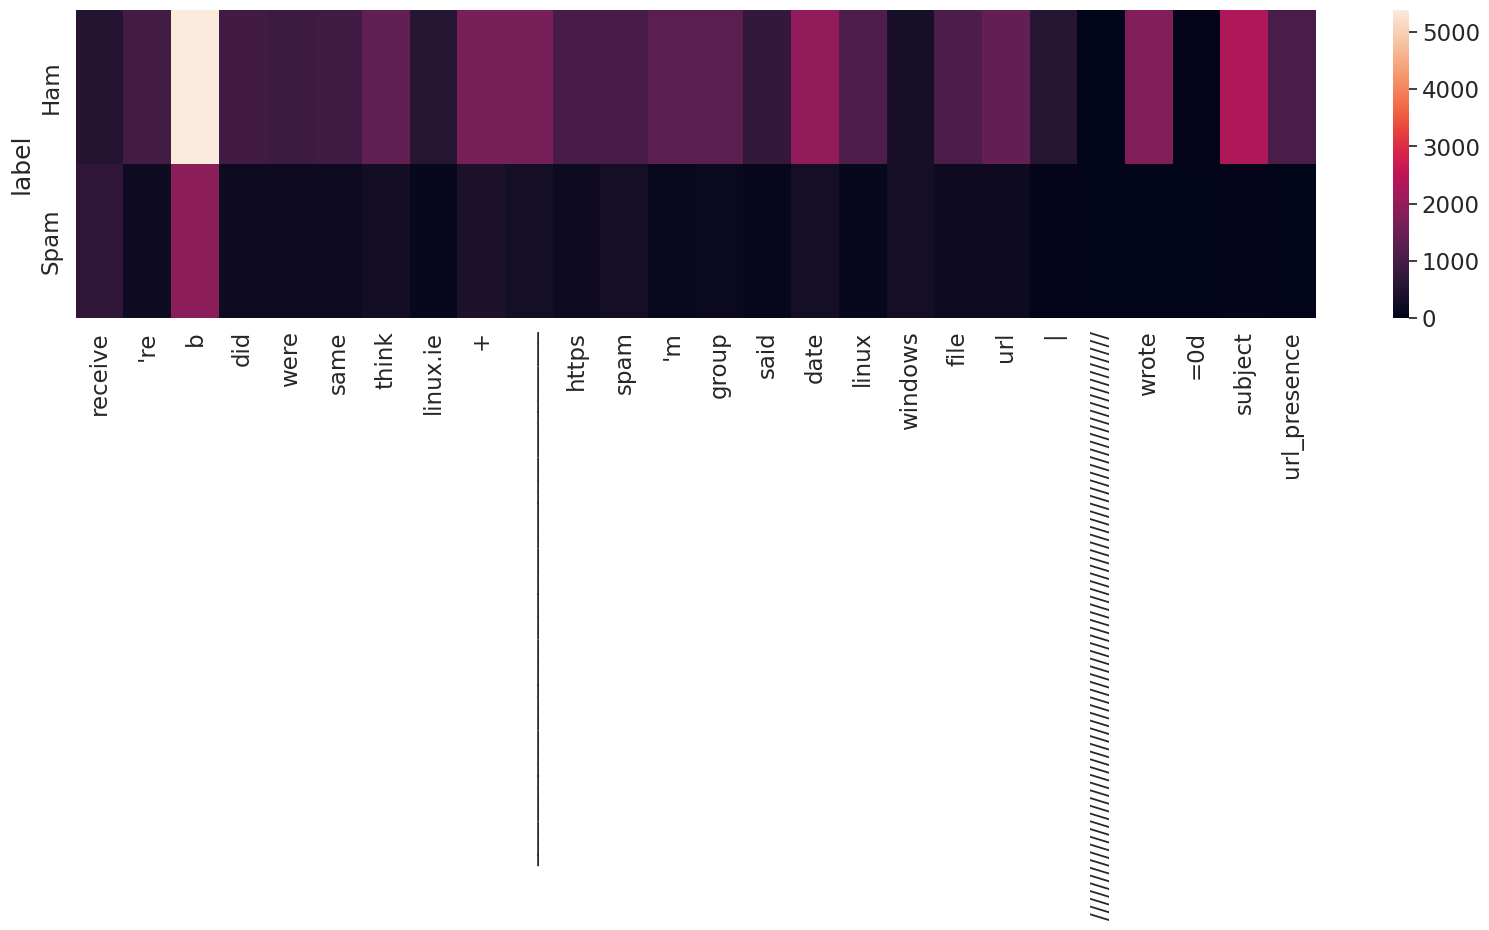

In [36]:
# Write your description (2-3 sentences) as a comment here:
  # The HTML tag in the text of the email was removed, and words that appear a lot in spam mail but rarely in ham mail, or that appear a lot in spam mail but rarely in ham mail are extracted. 
  # I plot the heat map of information about how many emails contain the extracted word in each spam mail and ham mail. 
  # There are some words that a lot of ham mails contain, but spam mails don't. Using the characteristics of whether these words are included in the email text, a classifier was created to distinguish whether they are spam mail or not.

# Write the code to generate your visualization here:
X_train = pd.DataFrame(X_train)
X_train.columns = distinguishing_word+["subject", "url_presence"]
X_train["label"] = train["spam"]
data = X_train.replace({'label': {0 : 'Ham', 1 : 'Spam'}}).groupby(['label']).sum()
plt.figure(figsize = (20,4))
sns.heatmap(data)

### Question 8: Precision-Recall Curve

We can trade off between precision and recall. In most cases we won't be able to get both perfect precision (i.e. no false positives) and recall (i.e. no false negatives), so we have to compromise.

Recall that logistic regression calculates the probability that an example belongs to a certain class. 
* Then, to classify an example we say that an email is spam if our classifier gives it $\ge 0.5$ probability of being spam. 
* However, *we can adjust that cutoff*: we can say that an email is spam only if our classifier gives it $\ge 0.7$ probability of being spam. 

This is how we can trade off false positives and false negatives. The precision-recall curve shows this trade off for each possible cutoff probability. In the cell below, [plot a precision-recall curve](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#plot-the-precision-recall-curve) for your final classifier.

<!--
BEGIN QUESTION
name: q9
manual: True
points: 3
-->
<!-- EXPORT TO PDF -->

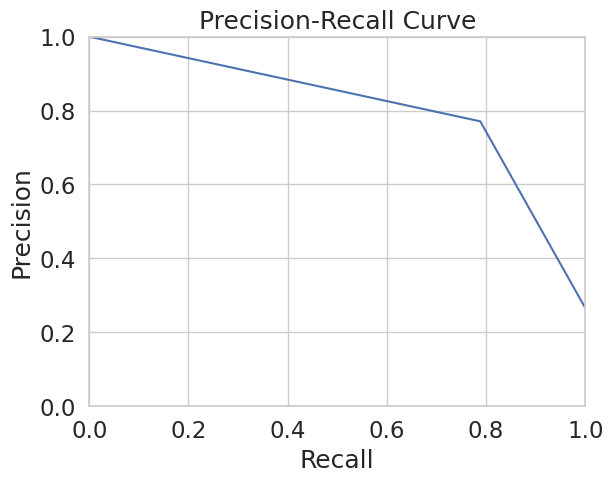

In [38]:
from sklearn.metrics import precision_recall_curve

# Note that you'll want to use the .predict_proba(...) method for your classifier
# instead of .predict(...) so you get probabilities, not classes

# BEGIN YOUR CODE
# -----------------------
y_true = Y_test
y_scores = Y_test_prediction

# Compute precision and recall values
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

# Plot the PR curve
plt.plot(recall, precision)

# Set plot title and axis labels
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

# Set plot axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# Show the plot
plt.show()
# -----------------------
# END YOUR CODE

### Congratulations! You have completed HW 3.

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.,

**Please save before submitting!**

Please generate pdf as follows and submit it to Gradescope.

**File > Print Preview > Print > Save as pdf**

<!-- EXPECT 9 EXPORTED QUESTIONS -->